In [1]:
%load_ext autoreload
%matplotlib inline
%config IPCompleter.use_jedi = False

import os
import pandas as pd
import numpy as np
import seaborn as sns
import pathlib

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'png'
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 120

In [ ]:
from portraits.plotting import pca_plot

In [2]:
%load_ext rpy2.ipython

Example on Ulloa-Montoya GSE35640, GPL570

# Get the data from GEO

In [3]:
GSE = 'GSE35640'
PLATFORM = 'GPL570'

current_dir = pathlib.Path().parent.absolute()
dir_to_process = str(current_dir / 'TMPDIR')

In [5]:
if not os.path.exists(dir_to_process):
    os.mkdir(dir_to_process)
os.chdir(dir_to_process)

In [35]:
%%bash
wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE35nnn/GSE35640/suppl/GSE35640_RAW.tar 

In [7]:
%%bash
tar -xf GSE35640_RAW.tar 
rm GSE35640_RAW.tar 

In [13]:
ls

GSM872328_MAGE008_sample_1.CEL.gz   GSM872361_MAGE008_sample_34.CEL.gz
GSM872329_MAGE008_sample_2.CEL.gz   GSM872362_MAGE008_sample_35.CEL.gz
GSM872330_MAGE008_sample_3.CEL.gz   GSM872363_MAGE008_sample_36.CEL.gz
GSM872331_MAGE008_sample_4.CEL.gz   GSM872364_MAGE008_sample_37.CEL.gz
GSM872332_MAGE008_sample_5.CEL.gz   GSM872365_MAGE008_sample_38.CEL.gz
GSM872333_MAGE008_sample_6.CEL.gz   GSM872366_MAGE008_sample_39.CEL.gz
GSM872334_MAGE008_sample_7.CEL.gz   GSM872367_MAGE008_sample_40.CEL.gz
GSM872335_MAGE008_sample_8.CEL.gz   GSM872368_MAGE008_sample_41.CEL.gz
GSM872336_MAGE008_sample_9.CEL.gz   GSM872369_MAGE008_sample_42.CEL.gz
GSM872337_MAGE008_sample_10.CEL.gz  GSM872370_MAGE008_sample_43.CEL.gz
GSM872338_MAGE008_sample_11.CEL.gz  GSM872371_MAGE008_sample_44.CEL.gz
GSM872339_MAGE008_sample_12.CEL.gz  GSM872372_MAGE008_sample_45.CEL.gz
GSM872340_MAGE008_sample_13.CEL.gz  GSM872373_MAGE008_sample_46.CEL.gz
GSM872341_MAGE008_sample_14.CEL.gz  GSM872374_MAGE008_sample_47.CEL.gz
GSM872

# Extracting expression from CEL file

In case of affy arrays without special probes we have to use justRMA<br>
For GPL570/GPL96 we can use gcrma

In [15]:
%%R

# Loading required R packages
library(affy)
library(annotate)
library(gcrma)

R[write to console]: Loading required package: BiocGenerics

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which

In [16]:
%%R -i dir_to_process -o normalized_expression

# Bulk read cell files
raw_expression <- ReadAffy(celfile.path = dir_to_process)

# Normalize expression using RMA
rma_normalized <- gcrma(raw_expression)

# Retrieving expressions from dataset
normalized_expression <- as.data.frame(exprs(rma_normalized))

R[write to console]: 



Adjusting for optical effect.................................................................Done.
Computing affinities.Done.
Adjusting for non-specific binding.................................................................Done.
Normalizing
Calculating Expression


In [18]:
normalized_expression.head()

,GSM872328_MAGE008_sample_1.CEL.gz,GSM872329_MAGE008_sample_2.CEL.gz,GSM872330_MAGE008_sample_3.CEL.gz,GSM872331_MAGE008_sample_4.CEL.gz,GSM872332_MAGE008_sample_5.CEL.gz,GSM872333_MAGE008_sample_6.CEL.gz,GSM872334_MAGE008_sample_7.CEL.gz,GSM872335_MAGE008_sample_8.CEL.gz,GSM872336_MAGE008_sample_9.CEL.gz,GSM872337_MAGE008_sample_10.CEL.gz,...,GSM872383_MAGE008_sample_56.CEL.gz,GSM872384_MAGE008_sample_57.CEL.gz,GSM872385_MAGE008_sample_58.CEL.gz,GSM872386_MAGE008_sample_59.CEL.gz,GSM872387_MAGE008_sample_60.CEL.gz,GSM872388_MAGE008_sample_61.CEL.gz,GSM872389_MAGE008_sample_62.CEL.gz,GSM872390_MAGE008_sample_63.CEL.gz,GSM872391_MAGE008_sample_64.CEL.gz,GSM872392_MAGE008_sample_65.CEL.gz
1007_s_at,9.811332,6.470581,9.109760,7.040136,8.716385,4.848676,7.186724,8.631181,5.618537,7.429797,...,6.282597,7.012282,7.528732,7.037582,8.804607,8.193118,8.452822,7.525328,4.722824,9.217646
1053_at,5.663456,6.539775,5.568130,5.744605,4.690514,5.922860,5.699696,5.120274,5.393646,6.704532,...,5.991613,6.753494,5.942335,6.333092,6.062780,6.359215,6.071876,7.140830,7.190948,5.611007
117_at,8.392470,6.080836,6.585071,6.091045,3.409561,3.789047,5.666034,4.964667,4.473665,4.441460,...,3.295174,5.637473,3.203354,3.469941,3.679389,8.969278,4.341028,5.736370,4.805148,10.329342
121_at,2.390067,2.344876,2.390067,2.387679,2.390067,2.390067,2.454047,2.390067,3.128001,2.390067,...,2.320199,2.390067,2.411106,2.390067,2.390067,2.390067,2.380717,2.390067,2.882447,2.433872
1255_g_at,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,...,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.349209,2.223265,2.223265,2.223265


Trim names 

In [19]:
normalized_expression.columns = normalized_expression.columns.to_series().apply(lambda x: x.split('_')[0]).values

<AxesSubplot:xlabel='PCA 1 component 11% variance explained', ylabel='PCA 2 component 9% variance explained'>

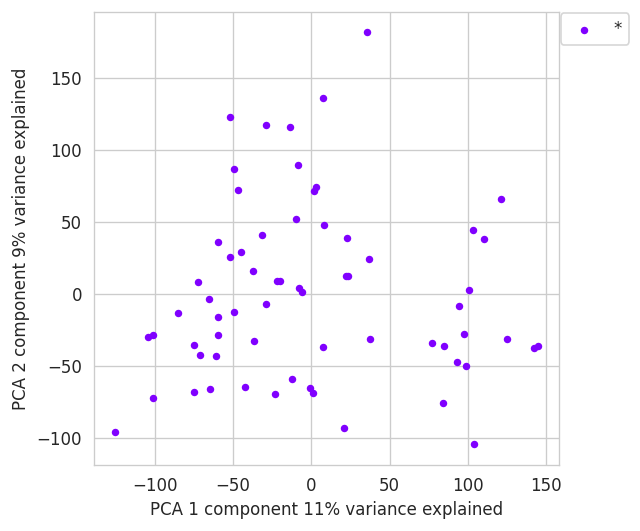

In [17]:
pca_plot(normalized_expression.T, legend='out')

In [20]:
normalized_expression.columns.value_counts().max()

1

In [21]:
normalized_expression.head()

,GSM872328,GSM872329,GSM872330,GSM872331,GSM872332,GSM872333,GSM872334,GSM872335,GSM872336,GSM872337,...,GSM872383,GSM872384,GSM872385,GSM872386,GSM872387,GSM872388,GSM872389,GSM872390,GSM872391,GSM872392
1007_s_at,9.811332,6.470581,9.109760,7.040136,8.716385,4.848676,7.186724,8.631181,5.618537,7.429797,...,6.282597,7.012282,7.528732,7.037582,8.804607,8.193118,8.452822,7.525328,4.722824,9.217646
1053_at,5.663456,6.539775,5.568130,5.744605,4.690514,5.922860,5.699696,5.120274,5.393646,6.704532,...,5.991613,6.753494,5.942335,6.333092,6.062780,6.359215,6.071876,7.140830,7.190948,5.611007
117_at,8.392470,6.080836,6.585071,6.091045,3.409561,3.789047,5.666034,4.964667,4.473665,4.441460,...,3.295174,5.637473,3.203354,3.469941,3.679389,8.969278,4.341028,5.736370,4.805148,10.329342
121_at,2.390067,2.344876,2.390067,2.387679,2.390067,2.390067,2.454047,2.390067,3.128001,2.390067,...,2.320199,2.390067,2.411106,2.390067,2.390067,2.390067,2.380717,2.390067,2.882447,2.433872
1255_g_at,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,...,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.349209,2.223265,2.223265,2.223265


In [22]:
%%bash 
rm *.CEL.gz

# Converting probes to HUGO gene symbols

Get chip SOFT file and make a 3-col file out of that.<br>
1st column: probe id<br>
2rd column: gene symbol column (as is with '///')<br>
3nd column: entrez id (not needed for the study)

In [23]:
pd.read_csv('GPL570.3col', index_col=None, sep='\t', header=None).head()

,0,1,2
0,1007_s_at,DDR1///MIR4640,780///100616237
1,1053_at,RFC2,5982
2,117_at,HSPA6,3310
3,121_at,PAX8,7849
4,1255_g_at,GUCA1A,2978


In [24]:
# from modules.mapping import get_gs_for_probes_from_3col, get_expressions_for_gs, get_database_dir, get_reverse_dictionary, get_expressions_list, defaultdict

In [25]:
def get_gs_for_probes_from_3col(platform_file, probe_list):
    """
    Getting probe-gene symbol dictionary

    :param platform_name: str, platform name
    :param probe_list: list, list with probe names

    :return: dict, dictionary with probe-gene symbol key-values
    """
    try:
        platform_data = pd.read_csv(platform_file, sep='\t', header=None, index_col=0, na_values=["NONE"])
    except Exception as e:
        logging.warning(f"Failed to read mapping 3col-file: {str(e)}")
        return None

    dict_raw_name_id = dict()
    not_found_probes_amount = len(set(probe_list).difference(platform_data.index))
    if not_found_probes_amount:
        logging.warn(f'{not_found_probes_amount} probes not found or format is not correct.')
        return dict()

    result = platform_data[1].loc[probe_list].dropna().astype(str).apply(
        lambda x: x.strip().replace(" ", "").split("///")).to_dict()

    return result

In [26]:
probes_gs_dict = get_gs_for_probes_from_3col('GPL570.3col', normalized_expression.index.tolist())

In [27]:
pd.Series(probes_gs_dict).head(n=20)

1007_s_at                 [DDR1, MIR4640]
1053_at                            [RFC2]
117_at                            [HSPA6]
121_at                             [PAX8]
1255_g_at                        [GUCA1A]
1294_at                   [MIR5193, UBA7]
1316_at                            [THRA]
1320_at                          [PTPN21]
1405_i_at                          [CCL5]
1431_at                          [CYP2E1]
1438_at                           [EPHB3]
1487_at                           [ESRRA]
1494_f_at                        [CYP2A6]
1552256_a_at                     [SCARB1]
1552257_a_at                     [TTLL12]
1552258_at      [LINC00152, LOC101930489]
1552261_at                        [WFDC2]
1552263_at                        [MAPK1]
1552264_a_at                      [MAPK1]
1552266_at                       [ADAM32]
dtype: object

In [28]:
def get_expressions_list(probes_list, probes_value_table, method='max'):
    """
    Returns list of expressions for matching gene_symbol

    :param probes_list: list, list of probes (for matching gene_symbol)
    :param probes_value_table: pd.DataFrame, matching table for probe_id and expression values (for each sample)
    :param method: str, getting expressions method (max / med )

    :return: list, list of expressions for matching gene_symbol
    """

    def average_expression(expressions_list):
        return sum(expressions_list) / len(expressions_list)

    probes_avg_expr_dict = {}
    # count average for all gsms
    for probe in probes_list:
        probes_avg_expr_dict[probe] = average_expression(probes_value_table.loc[probe, :])
    probe_res = ''
    if method == 'max':
        # choose probe-id with max average value
        probe_res = max(probes_avg_expr_dict, key=probes_avg_expr_dict.get)

    elif method == 'med':
        # choose probe with median value
        # if 2 probes choose probe with max average value

        # sort dict by values and return list of keys
        sorted_probes_list = sorted(probes_avg_expr_dict, key=probes_avg_expr_dict.get)
        if len(probes_list) % 2 == 0:
            probe_res = max(sorted_probes_list[len(probes_list) / 2 - 1],
                            sorted_probes_list[len(probes_list) / 2],
                            key=probes_avg_expr_dict.get)
        else:
            probe_res = sorted_probes_list[len(probes_list) / 2]
    return probes_value_table.loc[probe_res, :]
    

In [29]:
def get_expressions_for_gs(probes_gs_dict, probes_value_table, gs_sel_alg='max'):
    """
    Getting genes/samples expression table

    :param probes_gs_dict: dict, dictionary with probe-gene symbol key-values
    :param probes_value_table: pd.DataFrame, probes/samples expression transformed dataframe
    :param gs_sel_alg: str, getting expressions method (max / med )

    :return: gs_expr_table: pd.DataFrame, genes/samples expression table
    """
    import logging
    
    def get_reverse_dictionary(probes_gs_dict):
        from collections import defaultdict
        gs_probes_dict = defaultdict(list)
        for probe, gs_list in probes_gs_dict.items():
            for gs in gs_list:
                gs_probes_dict[gs].append(probe)
        return gs_probes_dict
    
    gs_expr_table = pd.DataFrame()

    logging.info("Making list of probes for each of gene-symbols ...")
    gs_probes_dict = get_reverse_dictionary(probes_gs_dict)

    logging.info("Making expression list for each of gene-symbols ...")
    for gs, probe_list in gs_probes_dict.items():
        # print(probe_list[:30])
        if (len(probe_list) == 1):
            gs_expr_table[gs] = probes_value_table.loc[probe_list[0], :]
        else:
            gs_expr_table[gs] = get_expressions_list(
                probes_list=probe_list,
                probes_value_table=probes_value_table,
                method=gs_sel_alg
            )

    logging.info(f'Final expression samples/gene symbols table shape: {gs_expr_table.shape}')

    return gs_expr_table

In [30]:
annotated_expression = get_expressions_for_gs(pd.Series(probes_gs_dict),
                                              normalized_expression, 'max').T.sort_index()

<AxesSubplot:>

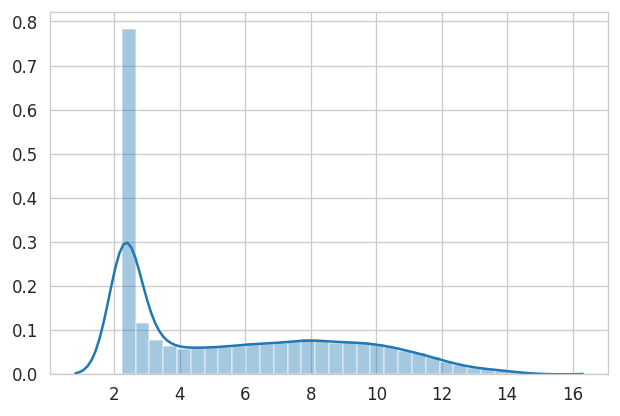

In [32]:
sns.distplot(annotated_expression.T.mean())

In [33]:
annotated_expression.head()

,GSM872328,GSM872329,GSM872330,GSM872331,GSM872332,GSM872333,GSM872334,GSM872335,GSM872336,GSM872337,...,GSM872383,GSM872384,GSM872385,GSM872386,GSM872387,GSM872388,GSM872389,GSM872390,GSM872391,GSM872392
A1BG,3.076475,2.987292,2.987292,3.165908,2.727649,3.655183,2.987292,2.987292,3.574711,6.003634,...,4.334097,3.014834,2.987292,3.565207,3.566093,2.987292,2.987292,2.898243,3.057402,2.987292
A1BG-AS1,5.749817,4.904232,4.387495,4.360151,4.243835,4.355736,4.493685,4.477549,4.594941,5.299739,...,4.309564,4.596462,4.635358,4.596462,4.605628,4.596462,4.596462,4.638988,4.412014,4.741860
A1CF,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,...,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265,2.223265
A2M,11.727785,11.030724,11.897919,10.843243,12.948972,12.603923,13.163574,11.997735,12.926909,12.836881,...,12.034571,12.973060,12.725227,10.293444,13.931666,13.758073,12.477485,10.576160,12.909493,12.791211
A2M-AS1,6.441273,6.099895,6.603606,5.386214,7.310987,7.769239,7.290848,6.464501,7.775331,7.137957,...,8.235774,7.260537,7.984555,4.548931,8.101128,8.616162,6.640015,5.115434,7.022282,8.439014


<AxesSubplot:xlabel='PCA 1 component 14% variance explained', ylabel='PCA 2 component 10% variance explained'>

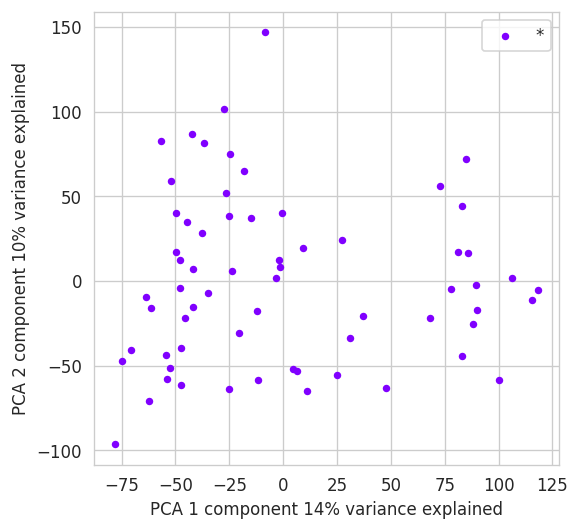

In [31]:
pca_plot(annotated_expression.T)

In [34]:
annotated_expression.to_csv('./expressions.tsv.gz', sep='\t', compression='gzip')